<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/EE-769-Introduction-to-Machine-Learning/blob/main/Assignments/Assignment_3_Q_3_(KPCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment details

Assignment number: 3 (Q.3 - Kernel PCA)

Course: EE 769 (Introduction to Machine Learning)

Instructor: [Prof. Amit Sethi](https://www.ee.iitb.ac.in/~asethi/)

Student name: Tejas Chaudhari

Student roll number: 10D110017


# Assignment questions
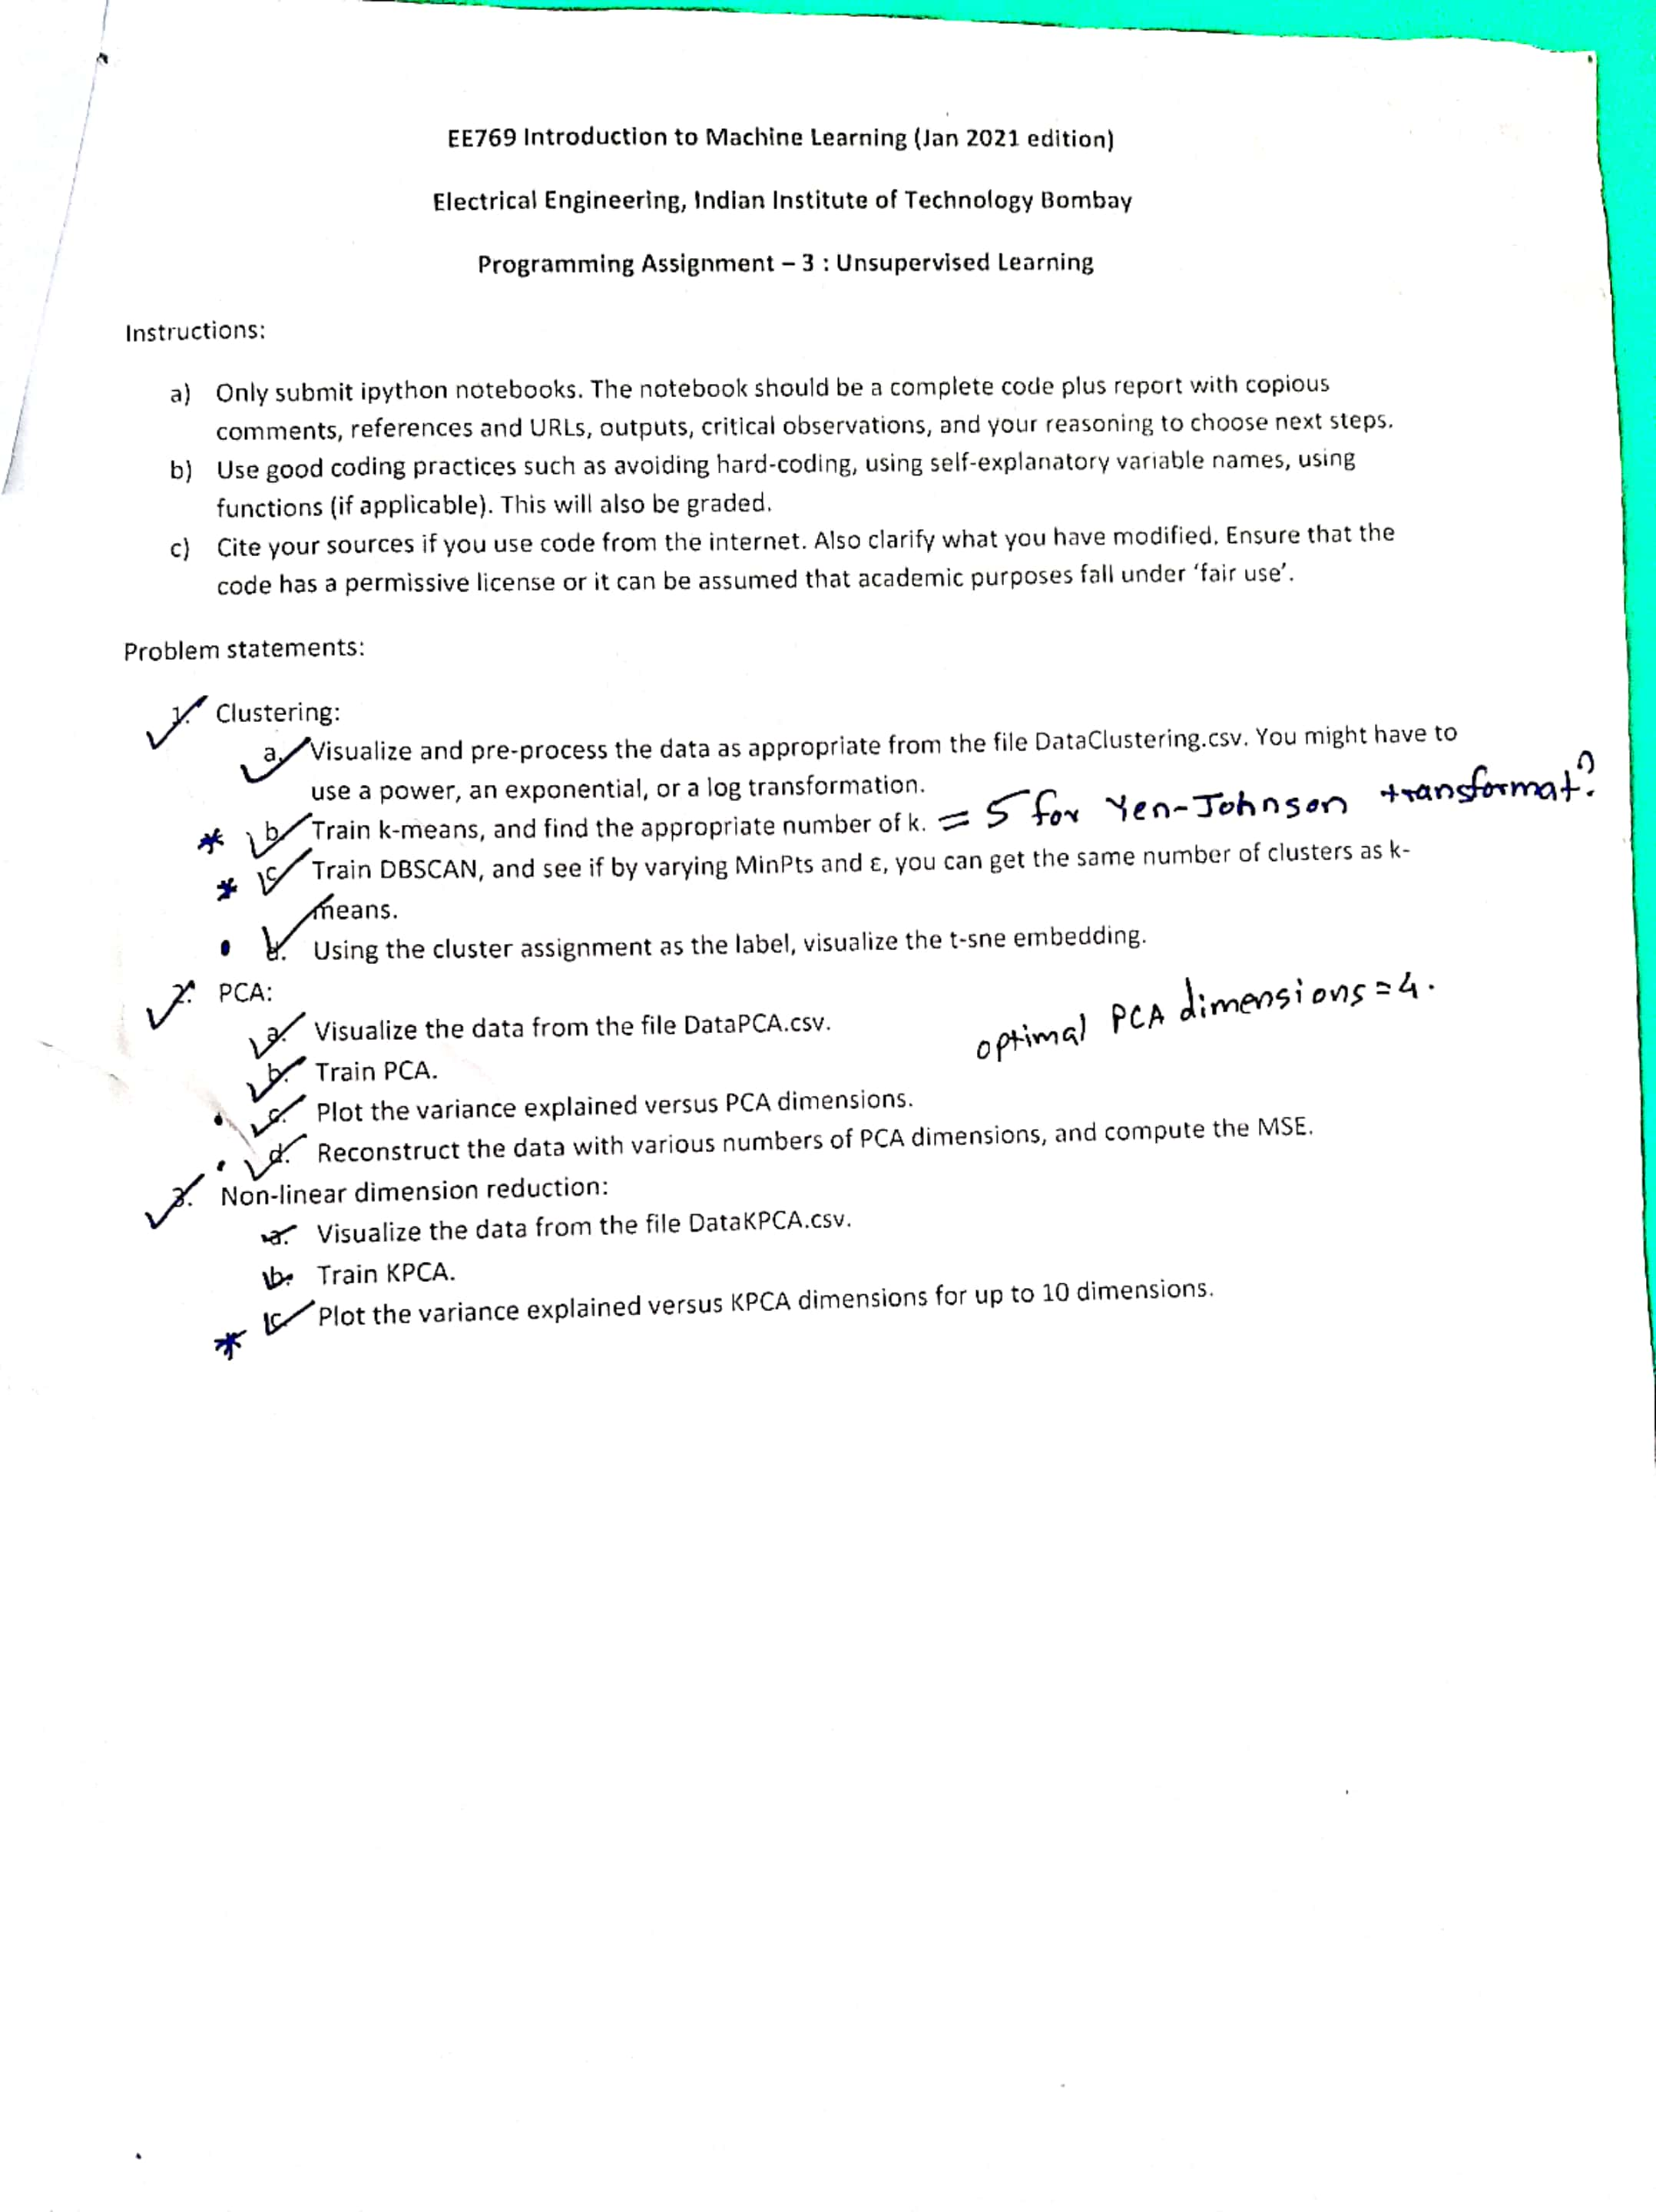

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

# Preliminary data processing

## Read data

In [ ]:
# Read data as pandas dataframe
as_read_data_df = pd.read_csv('/content/drive/MyDrive/EE 769/Assignment data/Assignment 3 data/DataKPCA.csv')

# Display
display(as_read_data_df)

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540
...,...,...,...,...,...,...,...
185,2.647090,14.246231,-44.947807,-10.412540,-2.809695,2.084152,1.903990
186,2.677908,14.620351,-45.776334,-10.196029,-2.640178,2.038005,1.910832
187,3.543866,14.487241,-49.692284,-7.773038,-1.865513,1.752195,1.952922
188,3.563404,13.945495,-49.131439,-8.156546,-2.104684,1.773425,1.914397


Observations:
1. 7 features and 190 data points per feature.

## Data types

In [ ]:
as_read_data_df.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
x7    float64
dtype: object

In [ ]:
as_read_data_df.dtypes.value_counts()

float64    7
dtype: int64

## Unique values

In [ ]:
as_read_data_df.nunique()

x1    190
x2    190
x3    190
x4    190
x5    190
x6    190
x7    190
dtype: int64

Observations:
1. All variables are continuous numerical.

## Missing values

In [ ]:
as_read_data_df.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

Observations:
1. No missing values in the data.

# Exploratory data analysis

## Numerical descriptive statistics

In [ ]:
display(as_read_data_df.describe())
display(as_read_data_df.agg(['skew', 'kurtosis']))

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


,x1,x2,x3,x4,x5,x6,x7
skew,0.568535,0.217917,0.520465,0.350070,-0.281871,1.892400,0.858658
kurtosis,-0.026622,0.111455,0.004477,-0.073983,-0.174759,4.397664,0.621997


Observations:
1. Skewness and kurtosis are close to zero for most of the variables. So seems like most of them would be Gaussian-like (bell-shaped)


## Graphical descriptive statistics

### Pairplots (distributions and correlations)

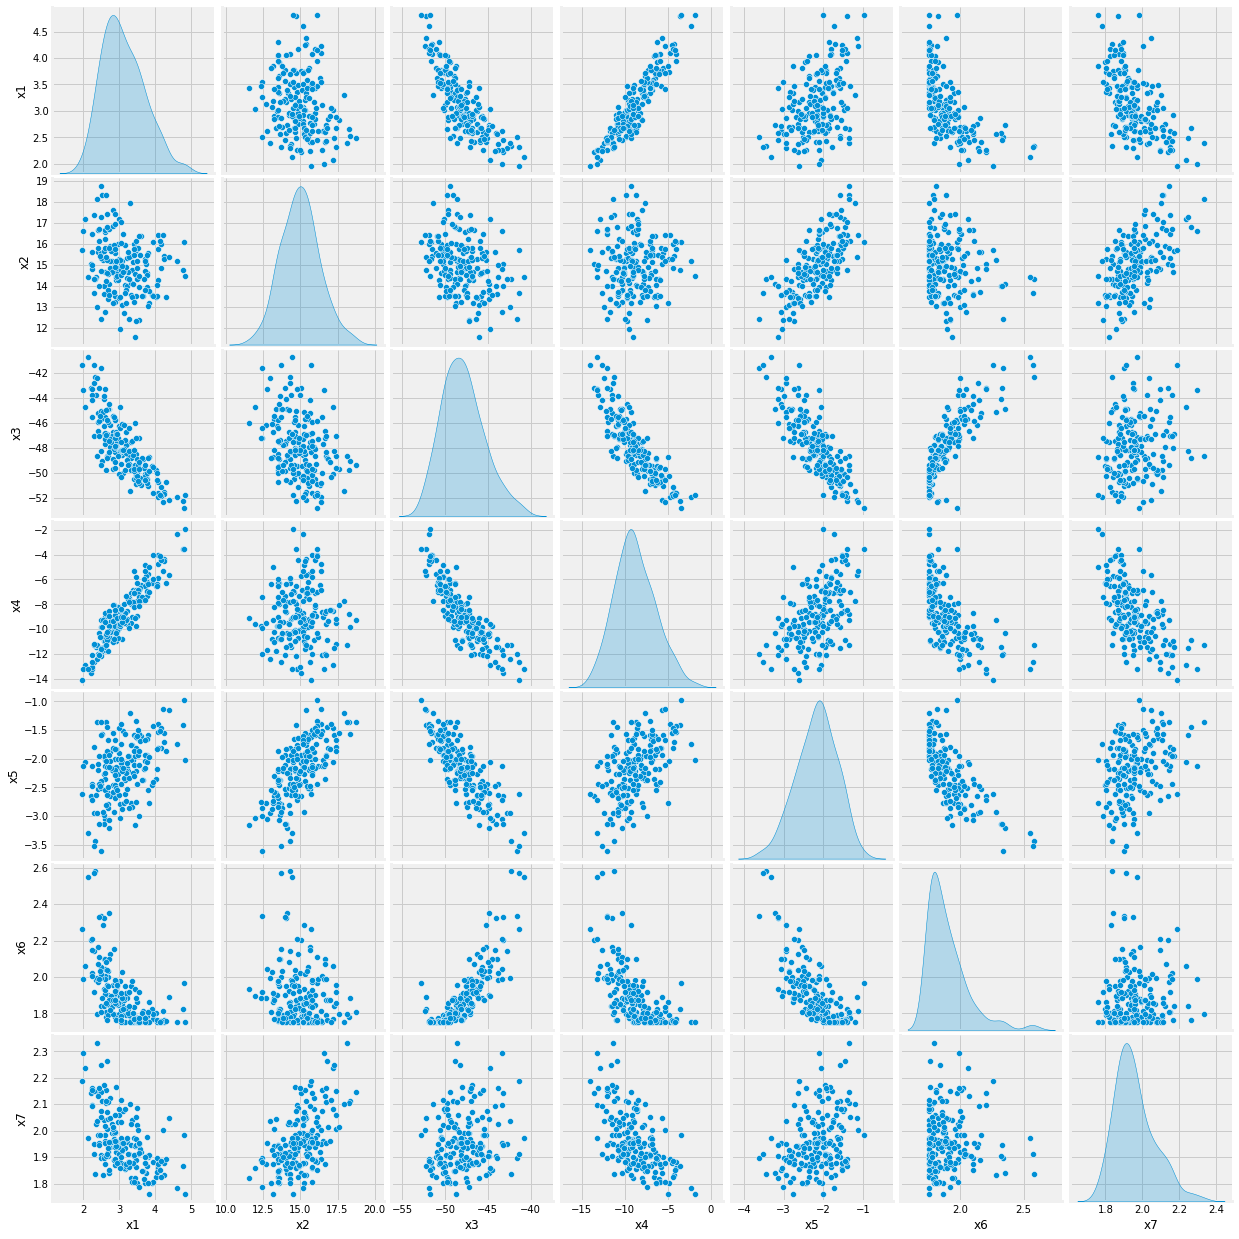

In [ ]:
sns.pairplot(as_read_data_df, diag_kind='kde')

Observations:
1. Few variables are seems to be correlated.
2. All the variables are almost Gaussian-like. X6 and x7 seems to be skewed a bit.

### Correlation heatmap

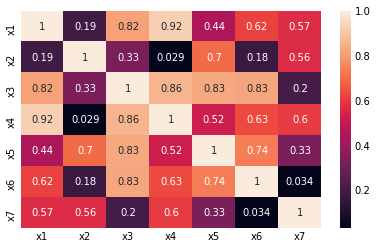

In [ ]:
# Calculate correlation matrix
correlation_matrix = as_read_data_df.corr()

# Plot absolute correlation heatmap
sns.heatmap(data=abs(correlation_matrix), annot=True)

Observations:
1. Very high correlation (0.92) between x1 and x4.
2. x3 is highly correlated (>0.8) with x4, x5 and x6.

### Boxplots (outliers)

In [ ]:
def plot_boxplots(data_df):
    """
    - Tejas Chaudhari
    """

    # Get number of subplots and create figure & subplots array
    n_subplots = len(data_df.columns)
    figure, axes_array = plt.subplots(n_subplots, 1, figsize=(5, n_subplots*5))

    for i, column_name in enumerate(data_df.columns):
        sns.boxplot(data=data_df[column_name], ax=axes_array[i])
        axes_array[i].set_title(f'Boxplot of {column_name}')  # Set title
        axes_array[i].set_xlabel(column_name) # Set x-axis label
        axes_array[i].set_ylabel('Values') # Set y-axis label

    # Adjust spacing between subplots and show
    plt.tight_layout(pad=2)
    plt.show()

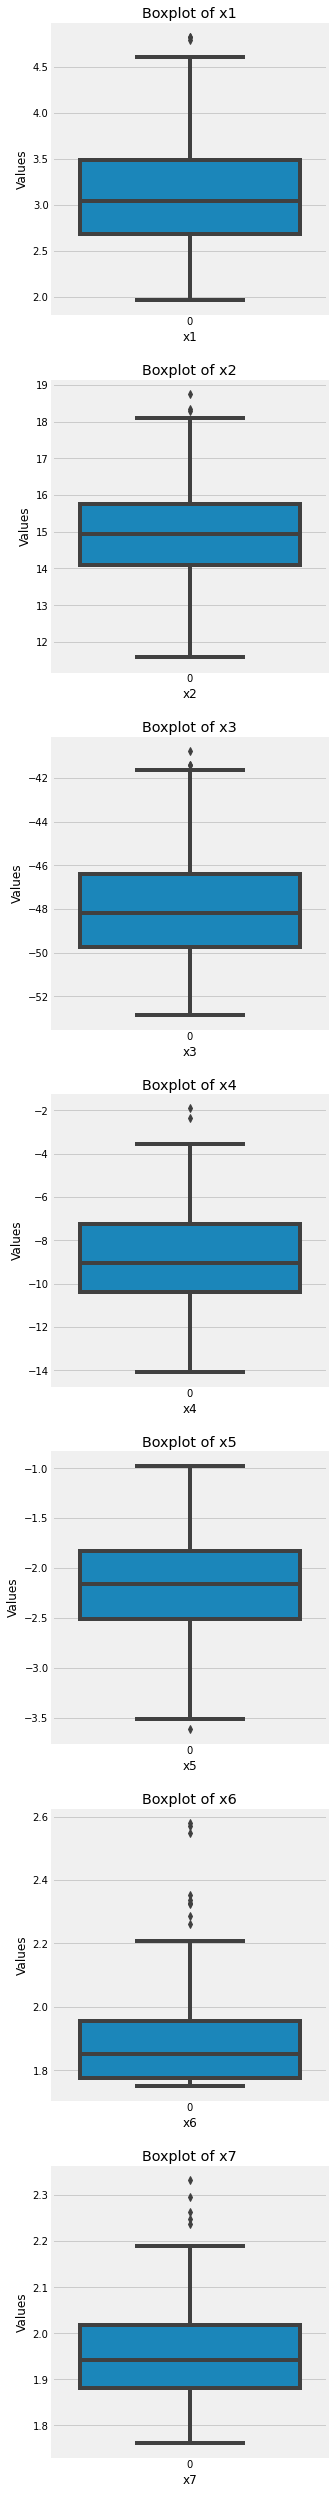

In [ ]:
plot_boxplots(as_read_data_df) 

Observations:
1. x6 and x7 has few outliers

# ML modelling

## Data preprocessing

### Train test split

In [ ]:
# Split data into train and test
X_train_df, X_test_df = train_test_split(as_read_data_df, test_size=0.15, random_state=7)

# Display train data
print('Train data:')
display(X_train_df.head(5))
print(X_train_df.shape)
print('--'*50)

# Display test data
print('Test data:')
display(X_test_df.head(5))
print(X_test_df.shape)

Train data:


,x1,x2,x3,x4,x5,x6,x7
117,4.226229,16.398620,-52.299125,-5.358973,-1.128808,1.813973,2.002344
66,2.895046,15.749372,-48.325311,-9.745379,-2.010986,1.865162,1.993347
113,3.426372,15.447840,-49.824131,-7.053874,-1.871973,1.773910,1.904143
120,3.132041,14.732023,-48.074247,-7.990482,-2.333802,1.872385,1.860059
31,3.452971,14.589797,-49.373898,-7.821504,-1.960896,1.763169,1.940382


(161, 7)
----------------------------------------------------------------------------------------------------
Test data:


,x1,x2,x3,x4,x5,x6,x7
22,3.344873,14.146277,-48.815944,-9.543378,-2.028590,1.773622,2.027035
177,3.119331,14.648949,-48.160857,-9.052788,-2.165426,1.821252,1.952359
46,3.184582,13.808927,-47.765868,-9.413670,-2.214006,1.789244,1.968266
63,2.308796,13.677815,-41.394425,-12.674399,-3.517304,2.571837,1.912837
24,2.341169,14.316498,-42.322515,-11.277108,-3.434474,2.580983,1.836224


(29, 7)


### Standardization

In [ ]:
# Create standard scalerr model instance
standard_scaler_model = StandardScaler()

# Fit the scaler model on train data
fitted_standard_scaler_model = standard_scaler_model.fit(X_train_df)

# Standardize train data
scaled_X_train_array = fitted_standard_scaler_model.transform(X_train_df)

# Convert to dataframe
scaled_X_train_df = pd.DataFrame(scaled_X_train_array, columns=X_train_df.columns, index=X_train_df.index)

# Standardize test data
scaled_X_test_array = fitted_standard_scaler_model.transform(X_test_df)

# Convert to dataframe
scaled_X_test_df = pd.DataFrame(scaled_X_test_array, columns=X_test_df.columns, index=X_test_df.index)

# Confirmation of train data standardizaton
print('Scaled train data:')
display(scaled_X_train_df.agg(['mean', 'std']))
display(scaled_X_train_df.agg(['mean', 'std']).mean(axis=1))
print('--'*50)

# Confirmation of test data standardization
print('Scaled test data:')
display(scaled_X_test_df.agg(['mean', 'std']))
display(scaled_X_test_df.agg(['mean', 'std']).mean(axis=1))
print('--'*50)

Scaled train data:


,x1,x2,x3,x4,x5,x6,x7
mean,-4.075415e-16,6.868212e-16,-2.974156e-15,-1.027473e-16,-3.106556e-16,-1.952200e-15,-2.340433e-15
std,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00


mean   -1.057273e-15
std     1.003120e+00
dtype: float64

----------------------------------------------------------------------------------------------------
Scaled test data:


,x1,x2,x3,x4,x5,x6,x7
mean,-0.146128,0.164407,0.111991,-0.089214,-0.153154,0.467809,-0.037509
std,0.996379,1.111256,1.136315,1.036402,1.187542,1.792280,1.149666


mean    0.045457
std     1.201406
dtype: float64

----------------------------------------------------------------------------------------------------


### Store train and test data for modelling

In [ ]:
X_train = scaled_X_train_df.copy(deep=True) # Modifications are independent
X_test = scaled_X_test_df.copy(deep=True)

## KPCA

### Train KPDA

In [ ]:
# Create KPCA model instance
KPCA_model = KernelPCA(n_components=10, random_state=7, n_jobs=-1)

# Fit model on train data
fitted_KPCA_model = KPCA_model.fit(X_train)

# Project train data
projected_X_train_array = fitted_KPCA_model.transform(X_train)

# Convert to dataframe
projected_X_train_df = pd.DataFrame(projected_X_train_array, index=X_train.index).add_prefix('Projected dimension ')

# Display projected train data
display(projected_X_train_df)

,Projected dimension 0,Projected dimension 1,Projected dimension 2,Projected dimension 3,Projected dimension 4,Projected dimension 5,Projected dimension 6,Projected dimension 7,Projected dimension 8,Projected dimension 9
117,-3.452183,1.182676,0.628221,1.151409,-0.022340,-0.068960,-0.078411,0.0,0.0,0.0
66,0.093013,0.907550,0.035263,-0.263322,-0.250773,-0.033069,-0.087437,0.0,0.0,0.0
113,-1.633862,0.028857,0.106276,-0.370920,-0.013096,-0.036934,-0.039499,0.0,0.0,0.0
120,-0.220166,-0.849534,0.286296,-0.535040,-0.008245,-0.047504,0.009568,0.0,0.0,0.0
31,-1.232188,-0.197842,-0.555676,-0.054782,-0.060654,-0.052936,-0.001845,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
103,-3.434965,0.159521,0.837832,0.075616,0.327251,-0.133900,0.119109,0.0,0.0,0.0
151,0.941488,1.107090,-0.654902,-0.101249,0.053846,0.043221,0.047593,0.0,0.0,0.0
67,-2.031252,0.708607,-0.092724,-0.037776,0.051879,-0.070512,0.086135,0.0,0.0,0.0
25,3.579267,-0.755119,0.627959,-0.119255,0.451509,-0.090652,-0.056304,0.0,0.0,0.0


### Plot variance explained vs KPDA dimensions

Useful resource:
1. https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance

Text(0, 0.5, 'Cumulative explained variance (%)')

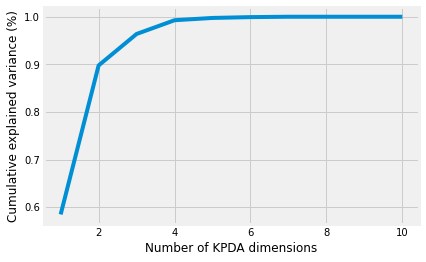

In [ ]:
# Get variance explained 
explained_variance_list = np.var(projected_X_train_df, axis=0)

# Get variance explained ratios (%)
explained_variance_ratios_list = explained_variance_list / np.sum(explained_variance_list)

# Get cumulative variance explained ratios
cumulative_explained_variance_ratios_list = np.cumsum(explained_variance_ratios_list)

# Get list of dimensions
n_dimensions_list = np.arange(start=1, stop=11, step=1, dtype=int)

# Plot cumulative variance explained ratio vs number of KPDA dimensions
sns.lineplot(x=n_dimensions_list, y=cumulative_explained_variance_ratios_list)
plt.xlabel('Number of KPDA dimensions')
plt.ylabel('Cumulative explained variance (%)')

Observations:
1. Almost all the variance is explained by just 4 dimensions.

# Credits

1. [EE 769: Module 11.3 Dimention Reduction - Kernel PCA](https://youtu.be/xn775UHEZog?list=PLZKhx5nBXhfhL28m4mjIM5kSwh5gUV2k6)

2. Dataset: EE 769 instructor ( [Prof. Amit Sethi](https://www.ee.iitb.ac.in/~asethi/)) and teaching assistants

3. [Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.](https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html)

# Useful resources:

1. [Stack Overflow: scikit-learn-kernel-pca-explained-variance](https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance)